# MNIST classification using a SGD classifier and Scikit-Learn functions

### A few packages to get you going
* We'll be loading many more throughout the tutorial
* Download the dataset by executing the proceeding cells

In [111]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

* Print dictionary keys

In [4]:
print(mnist.keys())
# or: for key in mnist:
    # print(key)

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

* Save the contents of the data and target from the MNIST dictionary into data_array and target array variables
    * Also print out the shape of data_array
* Notice the type of the target array – convert this to np.uint8 using the astype() method

In [14]:
data_array = np.array(mnist['data'])
print(data_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
data_array.shape

(70000, 784)

In [9]:
target_array = np.array(mnist['target'])
print(target_array.dtype)

object


In [43]:
target_array = target_array.astype(np.uint8)

* Print and glance over the description given in the mnist dictionary
* Plot an image of the very first image in the dataset (matplotlib imshow)

* Bonus ACTIVITY: Write a function that takes in the index of a sample and plots it


In [13]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

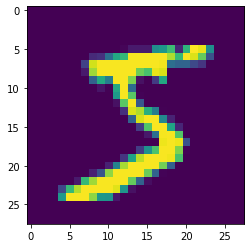

In [17]:
plt.imshow(X = data_array[0].reshape(28,28), aspect = 'equal')

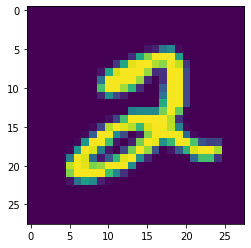

In [20]:
def index_plot(i):
    plt.imshow(X = data_array[i].reshape(28,28), aspect = 'equal')

index_plot(5)

### train_test_split
* apply train_test_split function in SciKitlearn to the dataset
turn off shuffle
# NB : generally use 80% of dataset for training, 20% for testing

In [44]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data_array, target_array, shuffle=False)
print(data_train, data_test, target_train, target_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [5 0 4 ... 7 1 4] [9 2 6 ... 4 5 6]


In [25]:
data_train.shape

(52500, 784)

In [26]:
data_test.shape

(17500, 784)

In [27]:
target_train.shape

(52500,)

In [28]:
target_test.shape

(17500,)

### Make a new target array (for only train dataset) that is composed of Boolean values (True for 5s and False for not 5s)
* Name the new array target_array_train_5


In [47]:
target_array_train_5 = target_train == 5



In [46]:
print(target_array_train_5, target_train)

[ True False False ... False False False] [5 0 4 ... 7 1 4]


### SGDClassifier
* Name it sgd_clf
* Fit the model to the data with the fives target
* Check to see if it worked using the predict function on a specific sample you know is a 5; also a sample you know is not a 5
    * Individual predictions will require a reshape (necessary command will appear in error)
*** NB: would normally implement sklearn's StandardScaler on the digits data_array (not targets). Run a new cross_val_score and see if it improved accuracy.


In [112]:
from sklearn.linear_model import SGDClassifier


In [77]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X = data_train, y = target_array_train_5)

SGDClassifier()

In [61]:
sgd_clf.predict(X = data_test[9].reshape(1,-1))

array([ True])

In [56]:
print(target_test[0:10])

[9 2 6 6 6 1 9 5 0 5]


### StandardScaler

In [71]:
from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline

In [72]:
scaler = StandardScaler()
scaler.fit(data_train)
data_train_scaled = scaler.transform(data_train)
sgd_clf_sc = SGDClassifier()
sgd_clf_sc.fit(X = data_train_scaled, y = target_array_train_5)

SGDClassifier()

### cross_val_score
* Implement it using 3-fold cross validation, scoring for accuracy


In [73]:
from sklearn.model_selection import cross_val_score

In [78]:
cross_val_score(sgd_clf, data_train, target_array_train_5, cv=3)

array([0.95468571, 0.95931429, 0.96617143])

In [76]:
cross_val_score(sgd_clf_sc, data_train_scaled, target_array_train_5, cv=3)

array([0.97045714, 0.96857143, 0.9652    ])

### Calculate the accuracy if the model always predicted not-5


In [88]:
sum(target_array_train_5)

4739

In [89]:
target_array_train_5.shape

(52500,)

In [91]:
# Accuracy=(TP+TN)/(TP+TN+FP+FN)
# TP = (52500-4739) TN =  FP = 4739 FN = 0
(52500-4739)/(52500)

0.9097333333333333

### cross_val_predict 
* Name the array of predictions target_array_train_5_pred

In [92]:
from sklearn.model_selection import cross_val_predict
target_array_train_5_pred = cross_val_predict(sgd_clf_sc, data_train_scaled, target_array_train_5, cv=3)

In [93]:
target_array_train_5_pred

array([False, False, False, ..., False, False, False])

### precision_score; recall_score

In [94]:
from sklearn.metrics import precision_score #precision is the ratio tp / (tp + fp) i.e. how good at not calling positive a sample actually negative
precision_score(target_array_train_5, target_array_train_5_pred)

0.8641214133270098

In [95]:
from sklearn.metrics import recall_score  #recall is the ratio tp / (tp + fn) i.e. ability to find all positive samples
recall_score(target_array_train_5, target_array_train_5_pred)

0.7689385946402194

In [97]:
from sklearn.metrics import precision_recall_fscore_support

In [99]:
precision_recall_fscore_support(target_array_train_5, target_array_train_5_pred, average='binary')

(0.8641214133270098, 0.7689385946402194, 0.8137561411344351, None)

### roc_curve
* Run cross_val_predict as before, but add method='decision_function'
* Use matplotlib plot to create ROC curve figure

In [96]:
target_array_train_5_predroc = cross_val_predict(sgd_clf_sc, data_train_scaled, target_array_train_5, cv=3, method='decision_function')

In [104]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(target_array_train_5, target_array_train_5_predroc)

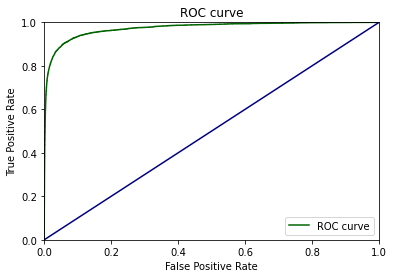

In [110]:
plt.title('ROC curve')
plt.plot(fpr, tpr, color="darkgreen",
    label="ROC curve")
plt.plot([0, 1], [0, 1],color="navy")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

### roc_auc_score

In [109]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(target_array_train_5, target_array_train_5_predroc)
roc_auc # want area under curve as close to 1 as possible - indicates with stringent thresholds taking FPR v low you still get high TPR

0.9732092840989902

### Find the cross_val_pred for the SGD classifier using all 10 classes (change targets)
* Use a new variable target_array_train_pred to save predictions 

In [113]:
sgd_clf_multi = SGDClassifier()
sgd_clf_multi.fit(X = data_train, y = target_train)

SGDClassifier()

In [116]:
print(target_test[0:10])

[9 2 6 6 6 1 9 5 0 5]


In [117]:
sgd_clf_multi.predict(X = data_test[5].reshape(1,-1))

array([1], dtype=uint8)

In [114]:
# cross_val_score
cross_val_score(sgd_clf_multi, data_train, target_train, cv=3)

array([0.84977143, 0.87291429, 0.84148571])

In [115]:
# cross_val_predict
target_train_pred = cross_val_predict(sgd_clf_multi, data_train, target_train, cv=3)
target_train_pred

array([5, 0, 4, ..., 7, 1, 4], dtype=uint8)

In [118]:
precision_recall_fscore_support(target_train, target_train_pred, average='macro')

(0.8662035049495079, 0.863771980908908, 0.8640658555042853, None)

In [119]:
### repeat for scaled data ###
sgd_clf_multi_sc = SGDClassifier() # or = SGDClassifier(max_iter = 1000, tol = 1e-3)
sgd_clf_multi_sc.fit(X = data_train_scaled, y = target_train)


/Users/judithsayers/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier()

In [120]:
# cross_val_score scaled
cross_val_score(sgd_clf_multi_sc, data_train_scaled, target_train, cv=3)

/Users/judithsayers/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/judithsayers/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.9008    , 0.89971429, 0.89708571])

In [121]:
# cross_val_predict scaled
target_train_pred_sc = cross_val_predict(sgd_clf_multi_sc, data_train_scaled, target_train, cv=3)
target_train_pred_sc

/Users/judithsayers/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/judithsayers/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([3, 0, 4, ..., 7, 1, 4], dtype=uint8)

In [136]:
precision_recall_fscore_support(target_train, target_train_pred_sc, average='macro')

(0.9056925292351288, 0.898778273849411, 0.9002747820188478, None)

### confusion_matrix

In [ ]:
# matrix to visualise class-wise errors and where they are being made in the model. 
# Anything off the diagonal is an error - if on the error, this shows true class = predicted class. 
# NB can take steps to mitigate - eg if 5s and 8s always being confused, can add more training data in these categories
# row = true value, column = predicted value

In [132]:
from sklearn.metrics import confusion_matrix

In [134]:
cm_SGD= confusion_matrix(target_train, target_train_pred_sc)
print(cm_SGD)

[[4880    0   24    6    8   51   32    3  179    1]
 [   1 5650   38   26    3   42    3    6  169   10]
 [  23   27 4587   87   57   27   59   32  294   10]
 [  18   15  111 4584    1  201   23   40  294   64]
 [  11   11   43    7 4554   10   35   17  247  154]
 [  25   15   32  148   47 3926   72   15  394   65]
 [  25   16   34    2   45   87 4885    7  103    0]
 [  14   12   50   26   42   12    4 4949  133  207]
 [  20   56   43   88    3  107   29    7 4714   37]
 [  20   18   27   57  117   33    2  160  275 4520]]


<AxesSubplot:>

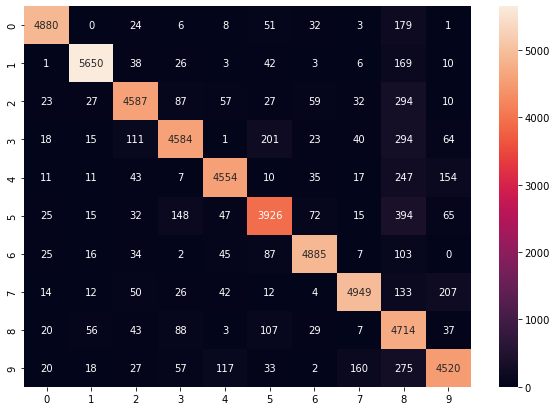

In [137]:
import seaborn as sn
import pandas as pd
confusion_matrix_plot = pd.DataFrame(cm_SGD, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(cm_SGD, annot=True, fmt = 'd')